<h2>Analysis of Food and Beverage (F&B) Sector's performance from 2019, impacts of the Covid-19 pandemic.</h2>

In [32]:
import pandas as pd
import matplotlib.pyplot  as plt
import matplotlib.dates as mdates
import seaborn as sns
import os
from dotenv import load_dotenv
import warnings

In [33]:
load_dotenv()
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl.reader.workbook")
pd.set_option('display.max_columns', None)

## Year-on-year

In [34]:
file_path = os.getenv("EXCEL_FILE_PATH1")
sheet_name = os.getenv("SHEET_NAME1")
dfYOY = pd.read_excel(file_path, sheet_name,  header= 2)
dfYOY = dfYOY.drop(index = dfYOY.tail(2).index)
# Cleans 1st 2 and last 2 columns containing metadata.

dfYOY.head()

,Period,Overall Food & Beverage Services,Restaurants,Fast Food Outlets,Food Caterers,"Cafes, Food Courts & Other Eating Places"
0,2015-01-01 00:00:00,-5.0,-10.3,-1.8,-6.8,1.3
1,2015-02-01 00:00:00,3.0,6.4,5.2,1.9,-1.6
2,2015-03-01 00:00:00,-1.0,1.0,-2.4,-1.5,-2.5
3,2015-04-01 00:00:00,-1.8,-4.1,0.4,2.2,-1.3
4,2015-05-01 00:00:00,-2.7,-6.2,-0.6,4.3,-1.6


In [35]:
# Check missing values
dfYOY.isna().sum()

Period                                      0
Overall Food & Beverage Services            0
Restaurants                                 0
Fast Food Outlets                           0
Food Caterers                               0
Cafes, Food Courts & Other Eating Places    0
dtype: int64

In [36]:
dfYOY = dfYOY.rename(columns={
    'Overall Food & Beverage Services': 'Overall',
    'Fast Food Outlets': 'Fast Food',
    'Food Caterers': 'Caterers',
    'Cafes, Food Courts & Other Eating Places': 'Others',
})
dfYOY['Period']= pd.to_datetime(dfYOY['Period'], format= '%m-%Y')
dfYOY.columns

Index(['Period', 'Overall', 'Restaurants', 'Fast Food', 'Caterers', 'Others'], dtype='object')

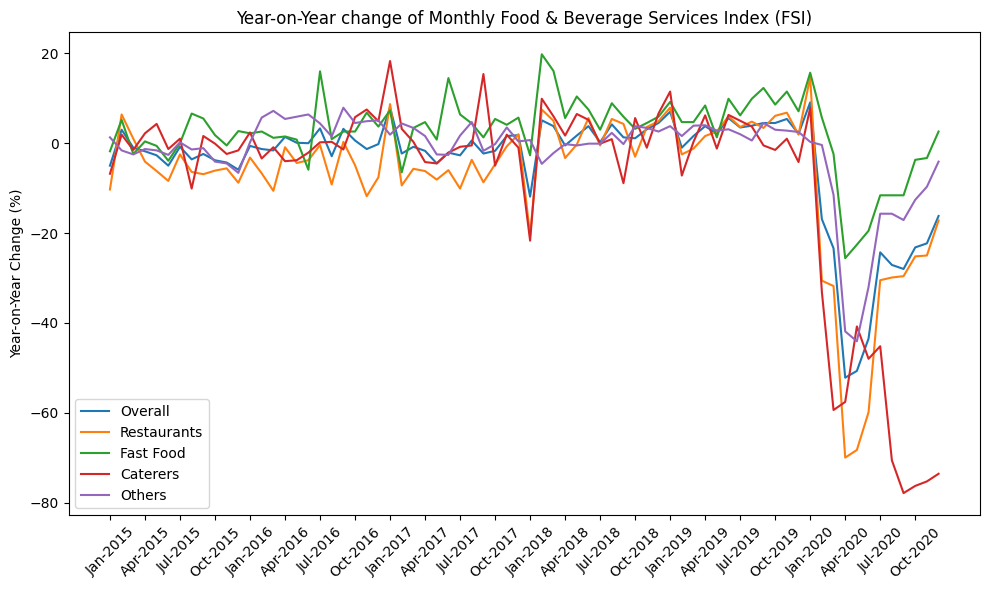

,Period,Overall,Restaurants,Fast Food,Caterers,Others
0,2015-01-01,-5.0,-10.3,-1.8,-6.8,1.3
1,2015-02-01,3.0,6.4,5.2,1.9,-1.6
2,2015-03-01,-1.0,1.0,-2.4,-1.5,-2.5
3,2015-04-01,-1.8,-4.1,0.4,2.2,-1.3
4,2015-05-01,-2.7,-6.2,-0.6,4.3,-1.6


In [37]:
fig, ax = plt.subplots(figsize=(10,6))

for column in dfYOY.columns[1:]:
    plt.plot(dfYOY['Period'].dt.strftime('%b-%Y'), dfYOY[column], label=column)

plt.ylabel('Year-on-Year Change (%)')
plt.title('Year-on-Year change of Monthly Food & Beverage Services Index (FSI)')
plt.xticks(rotation=45)
xticks = ax.get_xticks()
ax.set_xticks(xticks[::3])
plt.legend() 

plt.tight_layout()
plt.show()
dfYOY.head()

Insights:

1. Overall y-o-y trend on FSI stayed relatively stable from Jan 2015 to Dec 2020.
2. Distinct 16.8% drop in Feb 2020, followed by 52.2% drop in Apr 2020 on overall F&B categories, likely due to Covid-19 pandemic. As Singapore began its circuit breaker lockdown in April.
3. Restaurants were the worst hit with a 70% drop in April 2020, as compared to April 2019.

## Month-on-month

In [38]:
file_path = os.getenv("EXCEL_FILE_PATH1")
sheet_name = os.getenv("SHEET_NAME2")
dfMOM = pd.read_excel(file_path, sheet_name,  header= 2)
dfMOM = dfMOM.drop(index = dfMOM.tail(2).index)

dfMOM.tail()

,Period,Overall Food & Beverage Services,Restaurants,Fast Food Outlets,Food Caterers,"Cafes, Food Courts & Other Eating Places"
67,2020-08-01 00:00:00,-2.5,3.3,0.8,-47.1,0.1
68,2020-09-01 00:00:00,1.1,3.1,5.0,-25.8,0.5
69,2020-10-01 00:00:00,4.4,3.7,2.5,7.8,5.7
70,2020-11-01 00:00:00,3.5,3.6,3.3,5.2,3.4
71,2020-12-01 00:00:00,6.5,8.3,7.2,6.0,4.5


In [39]:
dfMOM = dfMOM.rename(columns={
    'Overall Food & Beverage Services': 'Overall',
    'Fast Food Outlets': 'Fast Food',
    'Food Caterers': 'Caterers',
    'Cafes, Food Courts & Other Eating Places': 'Others',
})
dfMOM['Period']= pd.to_datetime(dfMOM['Period'], format= '%m-%Y')



In [40]:
dfMOMfocussed = dfMOM[dfMOM['Period'] > pd.to_datetime("2019-11-01") ]

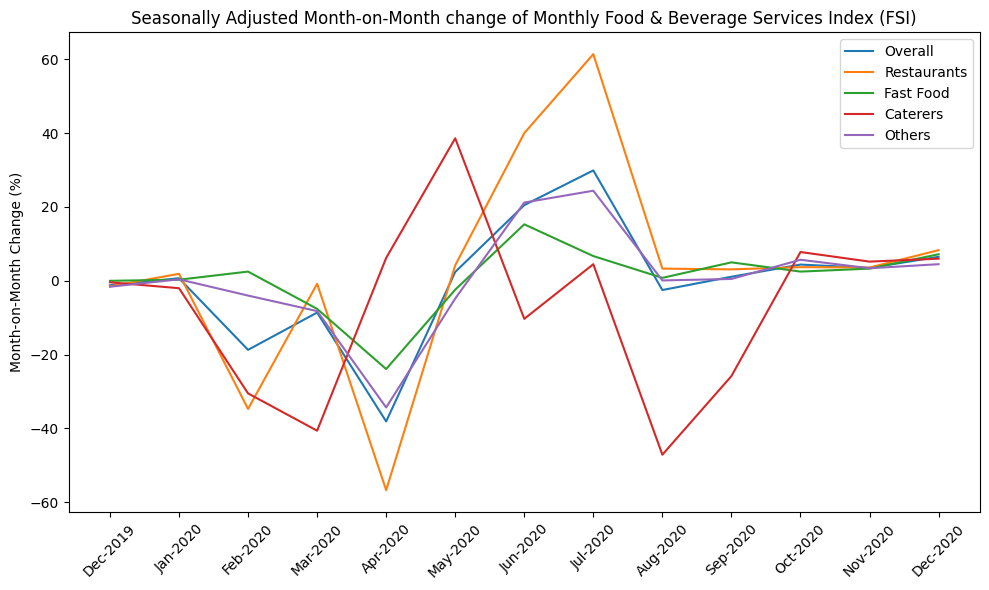

In [41]:
fig, ax = plt.subplots(figsize=(10,6))

for column in dfMOMfocussed.columns[1:]:
    plt.plot(dfMOMfocussed['Period'].dt.strftime('%b-%Y'), dfMOMfocussed[column], label=column)

plt.ylabel('Month-on-Month Change (%)')
plt.title('Seasonally Adjusted Month-on-Month change of Monthly Food & Beverage Services Index (FSI)')
plt.xticks(rotation=45)
xticks = ax.get_xticks()
ax.set_xticks(xticks[::1])
plt.legend() 

plt.tight_layout()
plt.show()

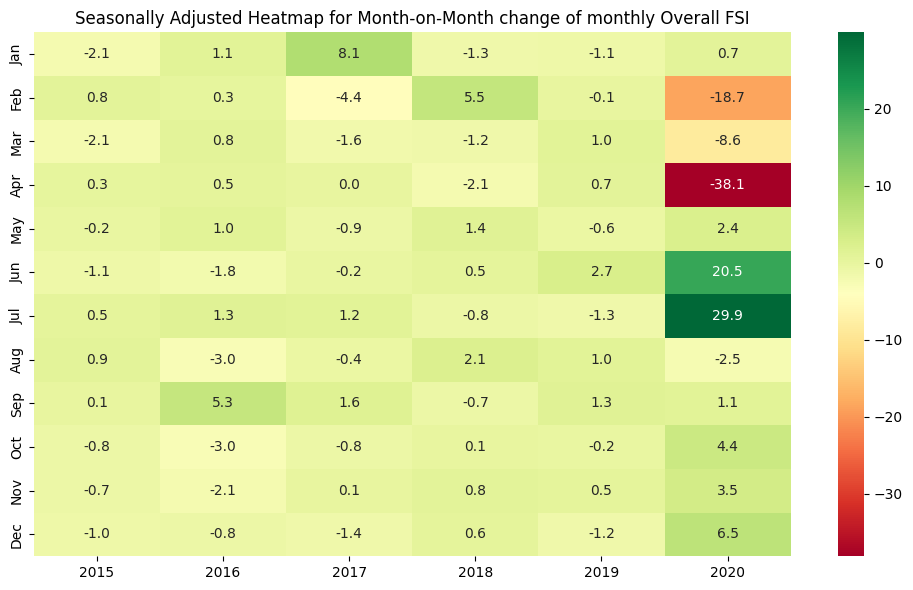

In [42]:
dfMOMsplit = dfMOM.copy()
dfMOMsplit['Year'] = dfMOM['Period'].dt.year
dfMOMsplit['Month'] = dfMOM['Period'].dt.strftime('%b')
dfMOMsplit01 = dfMOMsplit.drop(columns='Period')
dfMOMsplit01.tail()


heatmap_data = dfMOMsplit01.pivot(index = 'Month', columns= 'Year', values = 'Overall')
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
heatmap_data = heatmap_data.reindex(month_order)

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot= True, cmap= 'RdYlGn', cbar = True, fmt=".1f")
plt.xlabel('')
plt.ylabel('')
plt.title('Seasonally Adjusted Heatmap for Month-on-Month change of monthly Overall FSI')

plt.tight_layout()
plt.show()


Insights: 

1. Month-on-month visualisation allows us to study the short-term impact of Covid during affected months.
2.  From the heatmap, the F&B sector improved with a sharp 20.5% and 30% increase in the FSI for the months of June and July 2020 respectively. This was potentially due to Singapore loosening measures.
3. Phase 1 began in June 2020 which allowed home visits of up to 5 people. This could have driven more take-away and delivery orders, as it would be a convenient way for larger groups of people to dine together. Phase 2 from mid-June 2020, and Phase 3 from mid-July 2020, allowed dine-ins for groups of up to 2 and 5 persons respectively, these likely provided much needed relief to the F&B sector, increasing FSI index during these 2 months.
4. From the line chart, the Caterer's performance did not follow the trends of the other F&B categories during the pandemic. This stems from the consecutive heavy declines on February and March 2020 of 30.5% and 40.6%.
5. This could be because catering is generally prepared for large-scale events with many people. While other F&B establishments still had diners pre-April 2020, people were more averse to hosting or attending large events with increased crowd density.


# Online sales

In [43]:
file_path = os.getenv("EXCEL_FILE_PATH1")
sheet_name = os.getenv("SHEET_NAME3")
dfOnline= pd.read_excel(file_path, sheet_name,  header= 2)
dfOnline = dfOnline.drop(index = dfOnline.tail(2).index)

dfOnline.head()

,Period,Food & Beverage Sales Value ($Mil),Online Food & Beverage Sales Proportion (%)
0,2019-01-01 00:00:00,881.0,7.3
1,2019-02-01 00:00:00,875.0,7.4
2,2019-03-01 00:00:00,885.0,8.1
3,2019-04-01 00:00:00,840.0,8.2
4,2019-05-01 00:00:00,857.0,8.1


In [44]:
dfOnline = dfOnline.rename(columns={
    'Food & Beverage Sales Value ($Mil)': 'Value(Mil)',
    'Online Food & Beverage Sales Proportion (%)': 'Proportion(%)',
})
dfOnline['Period']= pd.to_datetime(dfOnline['Period'], format= '%m-%Y')
dfOnline['Online Sales'] = dfOnline['Value(Mil)'] * dfOnline['Proportion(%)'] / 100
dfOnline

,Period,Value(Mil),Proportion(%),Online Sales
0,2019-01-01,881.0,7.3,64.313
1,2019-02-01,875.0,7.4,64.750
2,2019-03-01,885.0,8.1,71.685
3,2019-04-01,840.0,8.2,68.880
4,2019-05-01,857.0,8.1,69.417
5,2019-06-01,873.0,8.7,75.951
6,2019-07-01,886.0,8.9,78.854
7,2019-08-01,925.0,9.4,86.950
8,2019-09-01,890.0,9.4,83.660
9,2019-10-01,898.0,9.8,88.004


In [45]:
dfOnline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Period         24 non-null     datetime64[ns]
 1   Value(Mil)     24 non-null     float64       
 2   Proportion(%)  24 non-null     float64       
 3   Online Sales   24 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 900.0 bytes


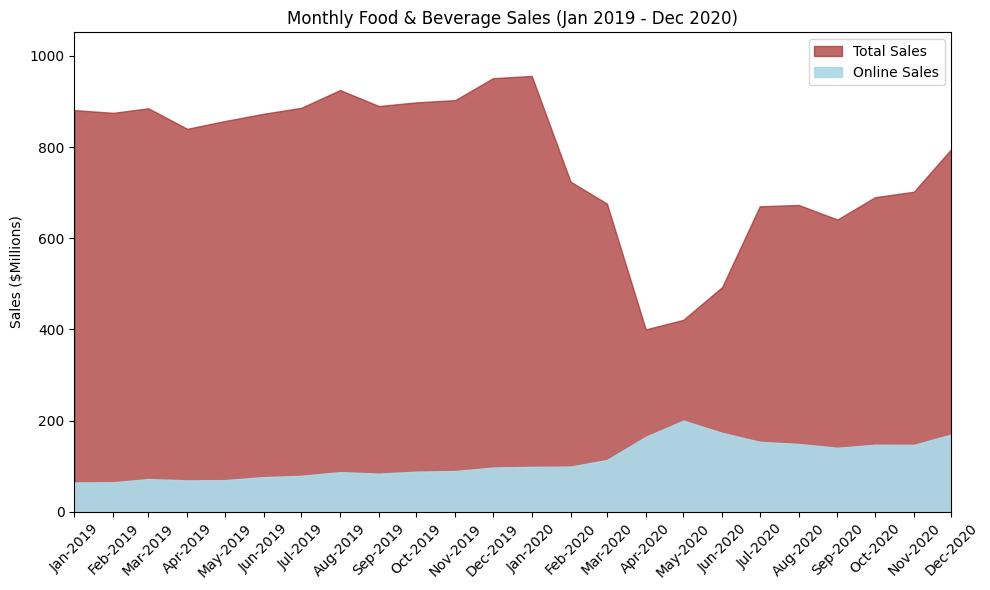

In [46]:
fig,ax = plt.subplots(figsize = (10,6))
ax.fill_between(dfOnline['Period'], dfOnline['Value(Mil)'], color = 'brown', alpha = 0.7, label = 'Total Sales')
ax.fill_between(dfOnline['Period'], dfOnline['Online Sales'], color = 'lightblue', alpha = 0.95, label = 'Online Sales')

ax.set_ylabel("Sales ($Millions)")
ax.legend()

ax.xaxis.set_major_locator(mdates.MonthLocator())  # Set monthly intervals
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y')) 

plt.xticks(rotation=45)
ax.set_ylim(0, dfOnline['Value(Mil)'].max() * 1.1) 
ax.set_xlim(dfOnline['Period'].min(), dfOnline['Period'].max())
plt.title('Monthly Food & Beverage Sales (Jan 2019 - Dec 2020)')
plt.tight_layout()
plt.show()

Insights:
1. While total sales fell, there was a noticeable increase in online sales from 10.3% in January 2020 up to 47.5% in May 2020 during the midst of the lockdown. While it fell back to 22.9% in July 2020, it never returns to pre-Covid levels for the following months.

Looking at a longer time horizon.. Combining data from Singstat table builder.
https://www.tablebuilder.singstat.gov.sg/table/TS/M602001

In [47]:
file_path = os.getenv("EXCEL_FILE_PATH2")
dfOnline2024= pd.read_excel(file_path, header= 9)
dfOnline2024 = dfOnline2024.drop(index = dfOnline2024.index[72:])
dfOnline2024["Data Series"] = dfOnline2024["Data Series"] .str.strip()

dfOnline2024.tail()

,Data Series,Food & Beverage Services (Percentage)
67,2019 May,8.1
68,2019 Apr,8.2
69,2019 Mar,8.1
70,2019 Feb,7.4
71,2019 Jan,7.3


In [48]:
dfOnline2024 = dfOnline2024.rename(columns = {
    "Data Series":"Period",
    "Food & Beverage Services (Percentage)":"Proportion(%)"
})

In [49]:
dfOnline2024["Period"] = pd.to_datetime(dfOnline2024["Period"], format="%Y %b")
dfOnline2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Period         72 non-null     datetime64[ns]
 1   Proportion(%)  72 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.3 KB


In [50]:
dfOnline2024 = dfOnline2024[dfOnline2024["Period"] > "2020 Dec"]
dfOnline2024 = dfOnline2024.sort_values(
    by = "Period"
)
dfOnline2024.tail()


,Period,Proportion(%)
4,2024-08-01,24.1
3,2024-09-01,24.3
2,2024-10-01,24.4
1,2024-11-01,24.7
0,2024-12-01,24.8


In [51]:
dfOnline2020 = dfOnline.drop(columns=["Value(Mil)", "Online Sales"])
dfAllOnline = pd.concat(objs=[dfOnline2020, dfOnline2024], ignore_index= True)

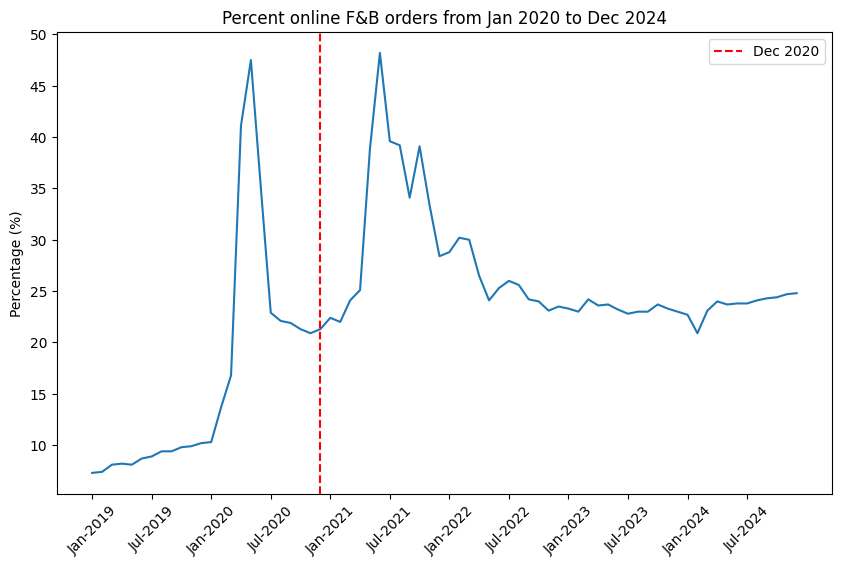

In [52]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(dfAllOnline['Period'].dt.strftime('%b-%Y'), dfAllOnline["Proportion(%)"])
ax.set_ylabel("Percentage (%)")
xticks = ax.get_xticks()
ax.set_xticks(xticks[::6])
plt.xticks(rotation=45)

# Add a broken dotted vertical line at Dec 2020
dec_2020_index = dfAllOnline[dfAllOnline["Period"] == "2020-12-01"].index[0]
ax.axvline(x=dec_2020_index, color='red', linestyle='dashed', linewidth=1.5, label = 'Dec 2020')
ax.legend()

plt.title("Percent online F&B orders from Jan 2020 to Dec 2024")
plt.tight_layout
plt.show()


Extending our analysis of online orders from Dec 2020, we can see the long term behaviour of online orders.

Insights:
1. There was another spike from May to June 2021. This coincides with Singapore's second lockdown from mid-May 2021 to mid-June 2021. The spikes could be correlated to the lockdowns, as people ordered food deliveries and take-aways through devices. 
2. Interestingly, even post-pandemic, with vast majority of the restrictions lifted, the online sale for F&B plateaued higher than pre-pandemic levels.
3. This could reflect a shift in lifestyle as people become more accustomed to purchasing food online. One example would be remote work arrangements gaining popularity post pandemic, such shifts in lifestyle could explain the higher % of online orders.